In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("/Users/sarabjotsingh/Downloads/tf_idf.csv")  # Replace "your_dataset.csv" with your dataset path

In [9]:
for column in data.columns:
    print(column)

comment_id
comment_score
self_text
subreddit
created_time
post_id
controversiality
ups
downs
user_is_verified
user_awardee_karma
user_awarder_karma
user_link_karma
user_comment_karma
user_total_karma
post_score
post_title
post_upvote_ratio
post_thumbs_ups
post_total_awards_received
post_created_time
total_comments
self_text_tokens
post_title_tokens
top_words_per_doc
combined_text
assigned_topic
Topics
self_text_sentiment
tokens
sentiment_score
net_upvotes
net_downvotes


In [10]:
# Ensure user_is_verified is True
data = data[data['user_is_verified'] == 1]

In [14]:
# Select columns for training
X = data[['Topics', 'assigned_topic', 'tokens', 'user_is_verified', 'sentiment_score']]
y = data['controversiality']

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Combine 'Topics' and 'assigned_topic' columns
X_train['combined_topics'] = X_train['Topics'] + ' ' + X_train['assigned_topic']
X_test['combined_topics'] = X_test['Topics'] + ' ' + X_test['assigned_topic']

# Combine 'tokens' and 'combined_topics' columns
X_train['combined_text'] = X_train['tokens'] + ' ' + X_train['combined_topics']
X_test['combined_text'] = X_test['tokens'] + ' ' + X_test['combined_topics']

TypeError: can only concatenate str (not "int") to str

In [ ]:
# Convert to DataFrame
X_train_array = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
X_test_array = pd.DataFrame(X_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate sentiment_score to the feature matrix
X_train_with_sentiment = pd.concat([X_train_array, X_train[['sentiment_score']]], axis=1)
X_test_with_sentiment = pd.concat([X_test_array, X_test[['sentiment_score']]], axis=1)

In [7]:
# Build and Train Naive Bayes Classifier with regularization
nb_classifier = MultinomialNB(alpha=0.1)  # Add alpha for Laplace smoothing (regularization)
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

In [8]:
# Predictions
y_pred = nb_classifier.predict(X_test_vectorized)

In [9]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, nb_classifier.predict_proba(X_test_vectorized)[:, 1])
roc_auc = auc(fpr, tpr)

# Print Actual and Predicted Values
print("Actual Values:", y_test.values)
print("Predicted Values:", y_pred)

Actual Values: [0 0 0 ... 0 0 0]
Predicted Values: [0 0 0 ... 0 0 0]


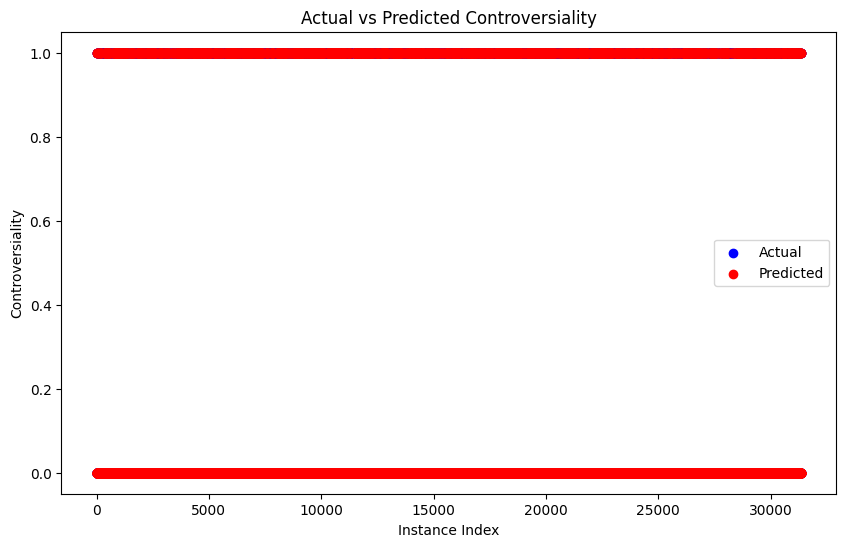

In [11]:
# Show Comparison Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Instance Index')
plt.ylabel('Controversiality')
plt.title('Actual vs Predicted Controversiality')
plt.legend()
plt.show()

In [12]:
# Print Evaluation Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Evaluation Metrics:
Accuracy: 0.8883608178367516
Precision: 0.1436265709156194
Recall: 0.16736401673640167
F1 Score: 0.15458937198067632


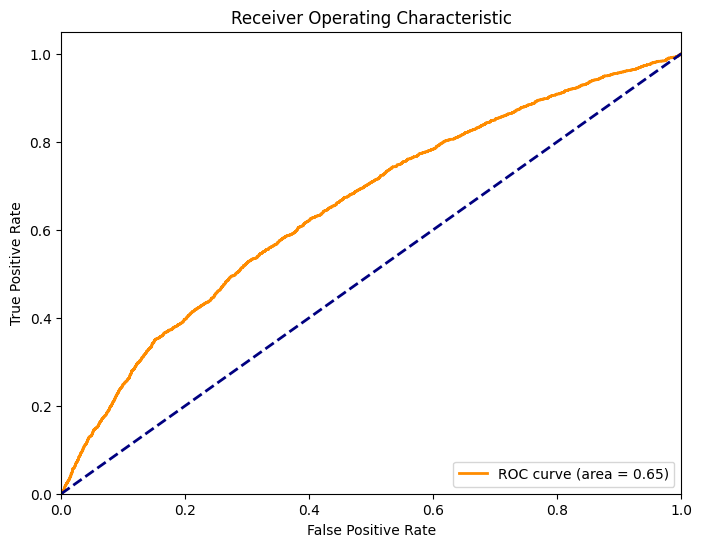

In [13]:
# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
